/var/folders/z4/rmcbqkwn7rj8vphlz5td69hm0000gn/T/ipykernel_21558/758884834.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)
/var/folders/z4/rmcbqkwn7rj8vphlz5td69hm0000gn/T/ipykernel_21558/758884834.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


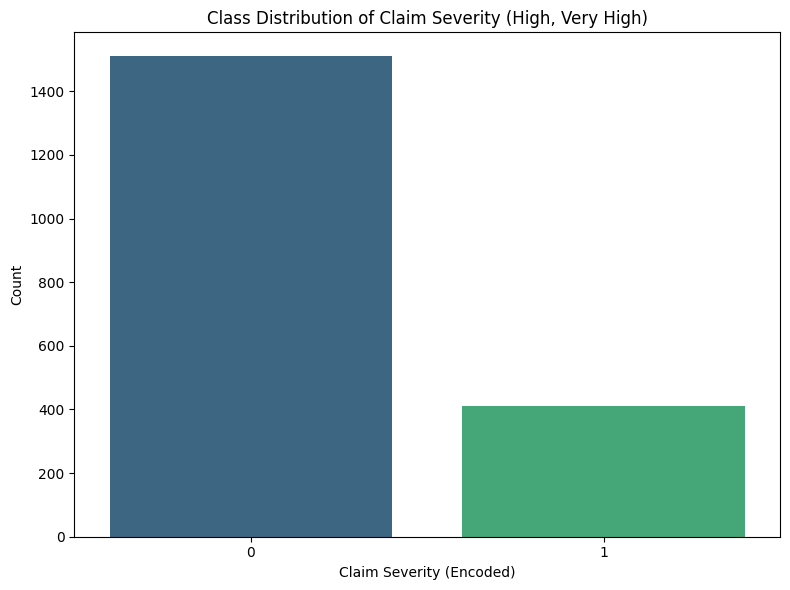

/var/folders/z4/rmcbqkwn7rj8vphlz5td69hm0000gn/T/ipykernel_21558/758884834.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="coolwarm")


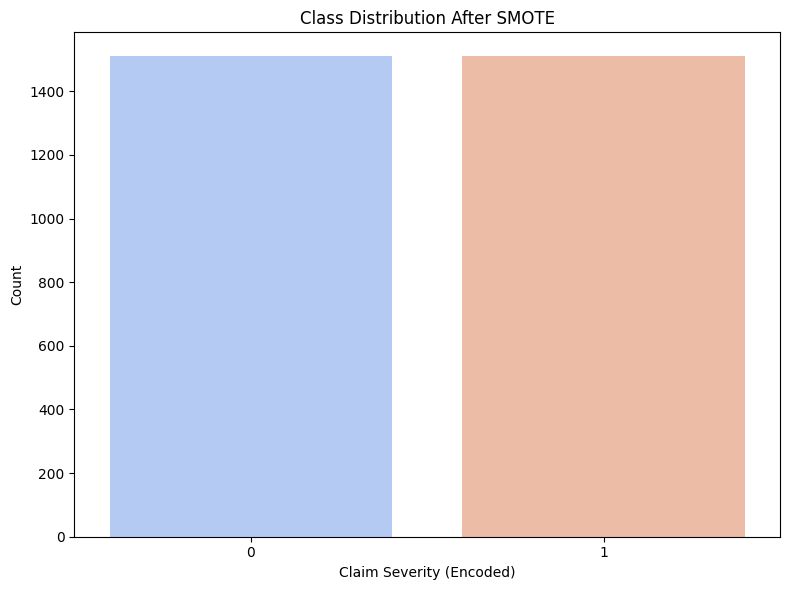

Random Forest Model:
Validation Set Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.93      0.44      0.60       244
           1       0.59      0.96      0.73       209

    accuracy                           0.68       453
   macro avg       0.76      0.70      0.67       453
weighted avg       0.78      0.68      0.66       453

Test Set Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.89      0.45      0.60       216
           1       0.66      0.95      0.78       237

    accuracy                           0.71       453
   macro avg       0.77      0.70      0.69       453
weighted avg       0.77      0.71      0.69       453



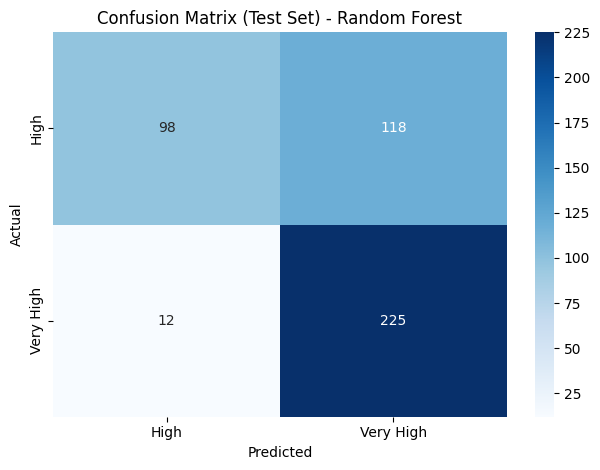

LightGBM Model:
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1064, number of negative: 1050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 2114, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503311 -> initscore=0.013245
[LightGBM] [Info] Start training from score 0.013245
Validation Set Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       244
           1       0.73      0.83      0.78       209

    accuracy                           0.78       453
   macro avg       0.78      0.78      0.78       453
weighted avg       0.79      0.

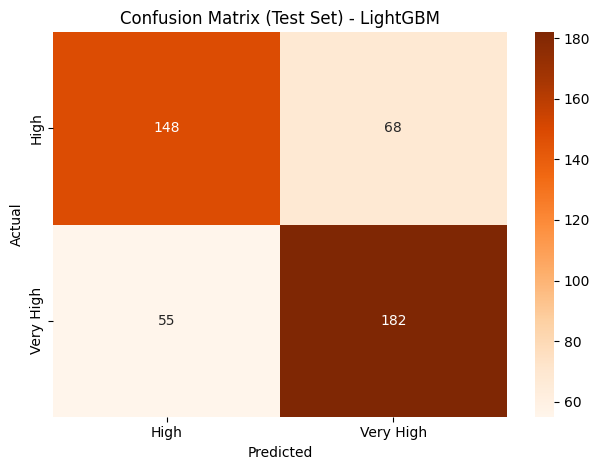

/var/folders/z4/rmcbqkwn7rj8vphlz5td69hm0000gn/T/ipykernel_21558/758884834.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances.head(15), x='Importance', y='Feature', palette='viridis')


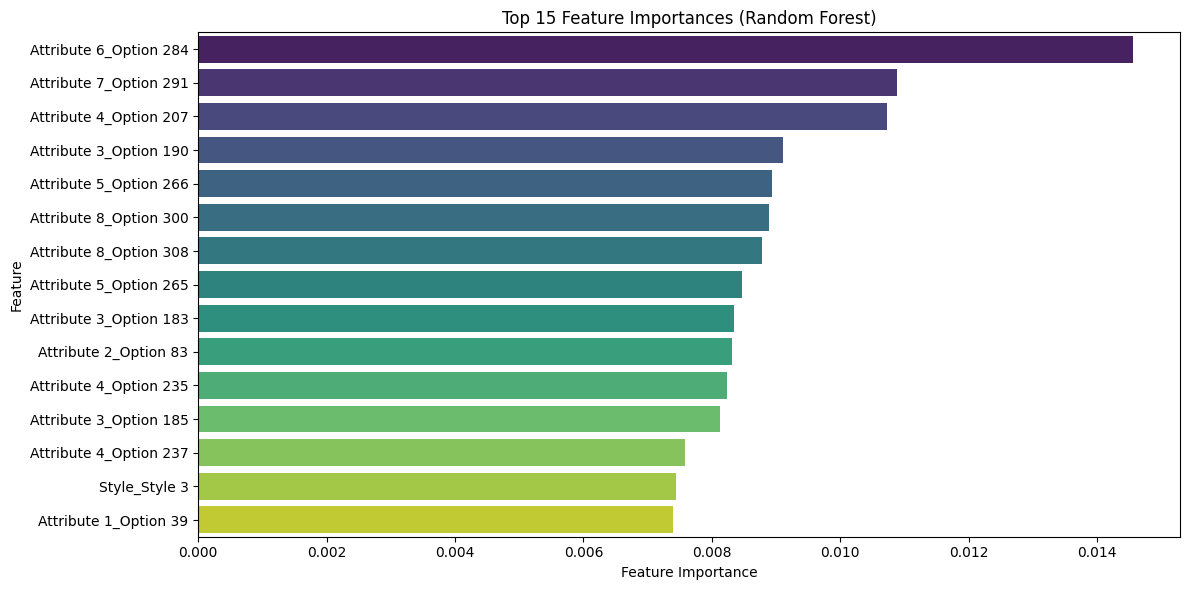

In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# File paths (update with your local paths)
claims_path = "/Users/jeevandeep/Downloads/Hackathon/Data/Claim Information file for UNT.xlsx"
options_path = "/Users/jeevandeep/Downloads/Hackathon/Data/Option Code Information file for UNT - Final.xlsx"

# Load datasets
claims_df = pd.read_excel(claims_path)
options_df = pd.read_excel(options_path)

# Merge datasets
merged_df = pd.merge(claims_df, options_df, left_on="Truck Number", right_on="Truck")

# Drop "Scale Labor Cost" as it is not contributing to claims
merged_df = merged_df.drop(columns=['Scale Labor Cost'], errors='ignore')

# Filter only High and Very High claims
filtered_df = merged_df[merged_df['Scale Claim Cost'].isin(['High', 'Very High'])]

# Encode categorical variables
categorical_columns = [col for col in filtered_df.columns if filtered_df[col].dtype == 'object' and col != 'Scale Claim Cost']
encoded_df = pd.get_dummies(filtered_df, columns=categorical_columns, drop_first=True)

# Encode target variable (Scale Claim Cost)
severity_mapping = {'High': 0, 'Very High': 1}
encoded_df['Scale Claim Cost'] = filtered_df['Scale Claim Cost'].map(severity_mapping)

# Define features (X) and target (y)
drop_columns = ['Truck Number', 'Claim Number', 'Truck']
available_drop_columns = [col for col in drop_columns if col in encoded_df.columns]
X = encoded_df.drop(columns=available_drop_columns + ['Scale Claim Cost'], axis=1)
y = encoded_df['Scale Claim Cost']

# Convert boolean columns to integers
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Check class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette="viridis")
plt.title("Class Distribution of Claim Severity (High, Very High)")
plt.xlabel("Claim Severity (Encoded)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Visualize class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette="coolwarm")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Claim Severity (Encoded)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Random Forest Model
print("Random Forest Model:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Evaluate Random Forest on Validation Set
y_val_pred_rf = rf_model.predict(X_val)
print("Validation Set Classification Report (Random Forest):")
print(classification_report(y_val, y_val_pred_rf))

# Evaluate Random Forest on Test Set
y_test_pred_rf = rf_model.predict(X_test)
print("Test Set Classification Report (Random Forest):")
print(classification_report(y_test, y_test_pred_rf))
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=severity_mapping.keys(), yticklabels=severity_mapping.keys())
plt.title("Confusion Matrix (Test Set) - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# LightGBM Model
print("LightGBM Model:")
lgbm_model = LGBMClassifier(random_state=42, learning_rate=0.1, n_estimators=100)
lgbm_model.fit(X_train, y_train)

# Evaluate LightGBM on Validation Set
y_val_pred_lgbm = lgbm_model.predict(X_val)
print("Validation Set Classification Report (LightGBM):")
print(classification_report(y_val, y_val_pred_lgbm))

# Evaluate LightGBM on Test Set
y_test_pred_lgbm = lgbm_model.predict(X_test)
print("Test Set Classification Report (LightGBM):")
print(classification_report(y_test, y_test_pred_lgbm))
conf_matrix_lgbm = confusion_matrix(y_test, y_test_pred_lgbm)
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Oranges', xticklabels=severity_mapping.keys(), yticklabels=severity_mapping.keys())
plt.title("Confusion Matrix (Test Set) - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Feature Importance Analysis (using Random Forest as an example)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot Top 15 Feature Importances
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importances.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


/var/folders/z4/rmcbqkwn7rj8vphlz5td69hm0000gn/T/ipykernel_21558/1821070023.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pair_analysis.head(10), x="Count", y="Pair", palette="viridis")


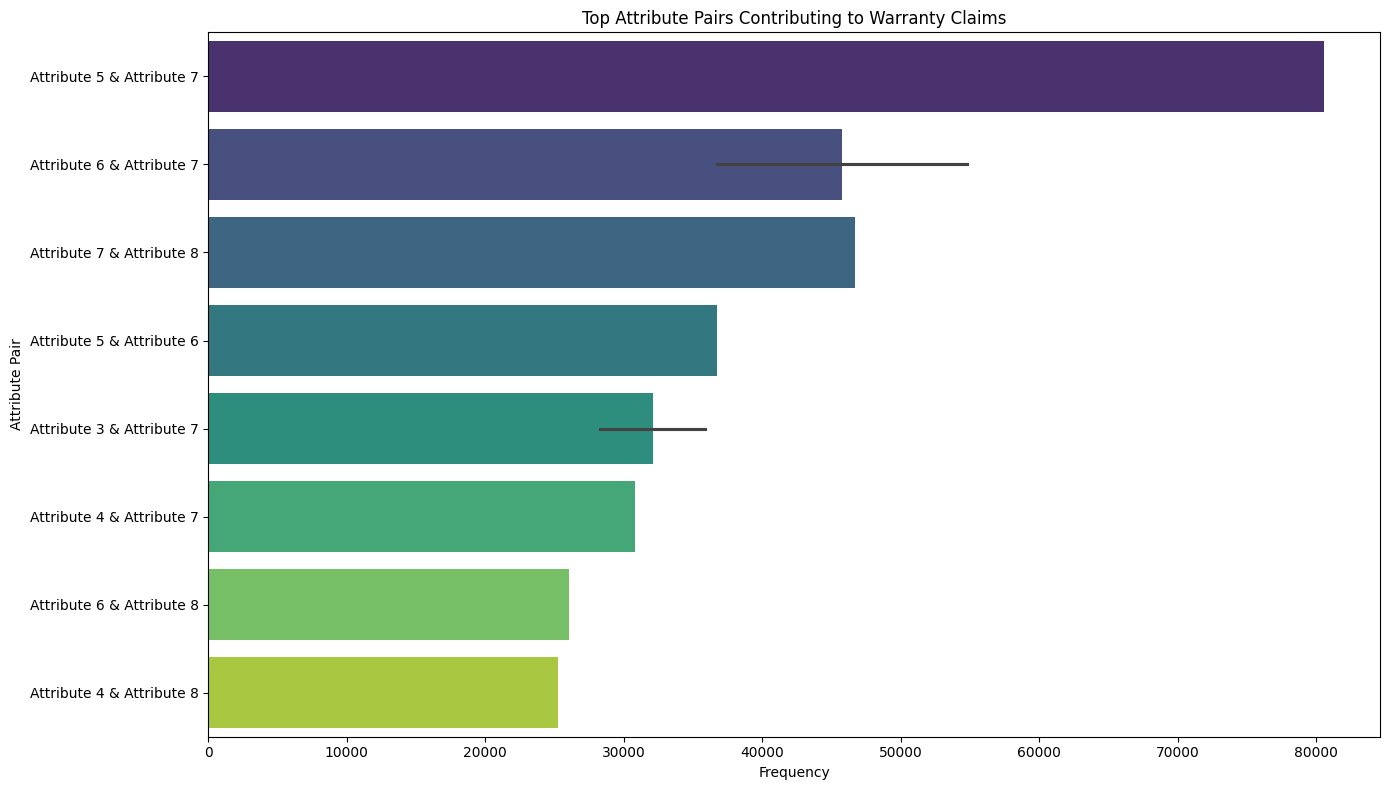

In [22]:
### STEP 10: ATTRIBUTE PAIR ANALYSIS
attribute_columns = [col for col in options_df.columns if "Attribute" in col]
attribute_pairs = list(combinations(attribute_columns, 2))

# Analyze significant pairs
pairwise_counts = {}
for attr1, attr2 in attribute_pairs:
    pairs = merged_df[[attr1, attr2]].apply(tuple, axis=1)
    pairwise_counts[(attr1, attr2)] = pairs.value_counts()

# Convert results to DataFrame
pair_analysis = pd.DataFrame([
    {'Pair': f'{attr1} & {attr2}', 'Combination': comb, 'Count': count}
    for (attr1, attr2), counts in pairwise_counts.items()
    for comb, count in counts.items()
]).sort_values(by='Count', ascending=False)

# Visualize top attribute pairs
plt.figure(figsize=(14, 8))
sns.barplot(data=pair_analysis.head(10), x="Count", y="Pair", palette="viridis")
plt.title("Top Attribute Pairs Contributing to Warranty Claims")
plt.xlabel("Frequency")
plt.ylabel("Attribute Pair")
plt.tight_layout()
plt.show()


Note: No missing values in the data, no redundant values as well. 

Understanding of the Datasets:

Options dataset has the details regarding the total number of types of modified trucks sold where "Truck" number is a specific ID given for a Specific Modification. Simply put it is a preset of customizations, Style is what kind of truck it is(vocational or On-highway etc), Attributes(1-8, which are the specific features/specifications for that specific customization)
PRIMARY KEY: TRUCK ID

Claims dataset has the Truck ID(Customization ID), Number of claimID(Number of claims can be taken from here what ever it has filed for), how expensive the claims are(L,VL etc), and how much time is being spent by the labor on the claims respectively(L, VL etc).
PRIMARY KEY: CLAIMS ID

Note: 'Low', 'Very low' and 'Medium' categories seem to dominate the Claims dataset. This means that there is a large number of trucks which are claiming for low cost replacements/Specifications, also the labor cost(time spent on repairing/work) is mostly dedicated working on 'Low', 'Very low' and 'Medium' etc, claims, which means that irrespective of the cost of the claim, be it high or a very high claim, it can still have low or very low labor costs. Simply put, the degree of claim is not directly proportional to the time spent on the claim.

For now let's focus on what kind of specifications are having highest number of claims and what kind of attributes are causing that. Here from the plot, it is clear that the data is a little skewed towards truck 14075 customizations which means that the attributes that are being used in these kind of customizations are having a high repair/claims probability.

This points that certain configurations are prone to more claims/problems


These graphs helps us understand the frequency of options being used in specific attributes (For eg, red color option is being picked the most under the color attribute)

Here we filtered out only the High and very high claims and are trying to see which attribute options are responsible for that.
Attribute 1: Options 39 and 31
Attribute 2: Option 100, 111, 84, 98
Attribute 3: Option 181, 183, 185
Attribute 4: Option 235, 207
Attribute 5: Option 265
Attribute 6: Option 283
Attribute 7: Option 291
Attribute 8: Options 300, 301, 302


Style 8 seems to have the highest claim rate, which means it will probably have most of the attributes that would account to filing more claims.

Attributes pair: (6,7), (5,7), (5,6), (7,8), (6,8) have more than 600 claims each. meaning certain configurations involving these attributes tend to fail more often. While individual attributes (e.g., Attribute 6 or 7) might not be problematic alone, their combination with others (e.g., Attribute 7 with 8) increases the likelihood of failures.

In [61]:
###########################################################################################################################################################################################################
###########################################################################################################################################################################################################
###########################################################################################################################################################################################################